In [92]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from os.path import join
from os import getcwd, mkdir, listdir
import pickle

## Regression - Dataset

In [2]:
num_samples = 10000

x = np.random.rand(num_samples)
y = np.zeros(num_samples)
y[0] = x[0]
for i in range(1,num_samples):
    y[i] = .5 + .5*x[i] - .5*x[i-1]

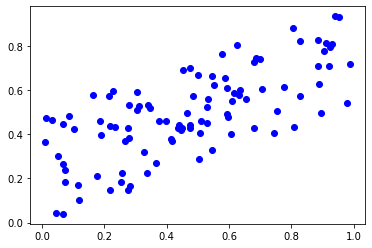

In [3]:
plt.plot(x[0:100],y[0:100], 'bo')

## Regression - Simple NN

In [4]:
ds_x = tf.data.Dataset.from_tensor_slices(x)
ds_y = tf.data.Dataset.from_tensor_slices(y)
dataset = tf.data.Dataset.zip((ds_x,ds_y)).batch(1000)

In [5]:
for item in dataset.take(1):
    print(item)

(<tf.Tensor: shape=(1000,), dtype=float64, numpy=
array([4.45484089e-02, 8.04672792e-01, 2.55567073e-01, 3.11423328e-01,
       9.28545325e-01, 7.44713043e-01, 7.54909641e-01, 1.74851853e-01,
       6.86846207e-02, 9.39453763e-01, 8.07272792e-01, 6.06640288e-01,
       5.92436980e-01, 5.09095439e-01, 2.78098855e-01, 9.10325865e-01,
       1.18782878e-01, 8.72515970e-02, 9.51744613e-01, 2.81262009e-01,
       3.04558497e-01, 3.44709592e-01, 9.03715475e-01, 8.94024309e-01,
       9.79383742e-01, 2.76824498e-01, 3.41189703e-01, 2.18031608e-01,
       2.79854989e-01, 1.07696918e-02, 1.63278355e-01, 4.98734290e-01,
       7.06186971e-01, 7.21674128e-02, 4.52064663e-01, 3.74608484e-01,
       5.94204599e-01, 4.49265747e-01, 5.05378235e-02, 5.77842912e-01,
       4.37064854e-01, 6.15712649e-01, 4.75497391e-01, 3.96028732e-01,
       1.89215587e-01, 6.84785218e-01, 3.28455769e-01, 9.22019540e-01,
       5.01977086e-01, 9.20149634e-01, 2.17799065e-01, 5.45134272e-01,
       9.87020589e-01, 6.59

In [6]:
model = keras.models.Sequential(name = "Single_neuron")
model.add(keras.layers.Dense(1, activation = None, input_shape = [1], name = "Dense"))
model.compile(optimizer = keras.optimizers.Adam(.001), loss = keras.losses.MeanSquaredError())
early_stopping = keras.callbacks.EarlyStopping(monitor='loss',patience=10, min_delta=.0001, verbose=True, restore_best_weights=True)
model.summary()

Model: "Single_neuron"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Restoring model weights from the end of the best epoch.
Epoch 00100: early stopping
10/10 [==============================] - 0s 3ms/step - loss: 0.0211


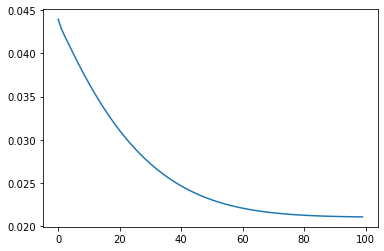

In [7]:
history = model.fit(dataset, epochs = 1000, verbose=0, callbacks=[early_stopping])
model.evaluate(dataset)
plt.plot(history.history['loss'])

## Regression - Recurrent unit

In [8]:
sequence_length = 32
batch_size = 64

ds_x = tf.data.Dataset.from_tensor_slices(x)
ds_y = tf.data.Dataset.from_tensor_slices(y)
dataset = tf.data.Dataset.zip((ds_x,ds_y)).batch(1).batch(sequence_length,drop_remainder=True).batch(batch_size)

In [13]:
for item in dataset.take(1):
    print(item[0].shape)

(64, 32, 1)


In [10]:
model = keras.models.Sequential(name = 'Simple_RNN')
model.add(keras.layers.SimpleRNN(units = 1, return_sequences=True, activation=None, input_shape=(None,1), name='Simple_RNN'))
model.compile(optimizer = keras.optimizers.Adam(.001), loss = keras.losses.MeanSquaredError())
early_stopping = keras.callbacks.EarlyStopping(monitor='loss',patience=10, min_delta=.0001, verbose=True, restore_best_weights=True)
model.summary()

Model: "Simple_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Simple_RNN (SimpleRNN)       (None, None, 1)           3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


5/5 [==============================] - 0s 11ms/step - loss: 0.0170


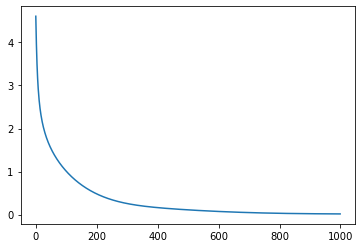

In [11]:
history = model.fit(dataset, epochs = 1000, verbose=0, callbacks=[early_stopping])
model.evaluate(dataset)
plt.plot(history.history['loss'])

## Classification - Dataset

In [2]:
num_samples = 10000

x = np.random.choice(np.arange(3), size=num_samples)
y = np.zeros_like(x)

for i in range(num_samples):
    if x[i] == 0:
        y[i] = np.random.choice(np.arange(3), size=1, p=[0, .75, .25])
    elif x[i] == 1:
        y[i] = np.random.choice(np.arange(3), size=1, p=[.25, 0, .75])
    elif x[i] == 2:
        y[i] = np.random.choice(np.arange(3), size=1, p=[.75, .25, 0])

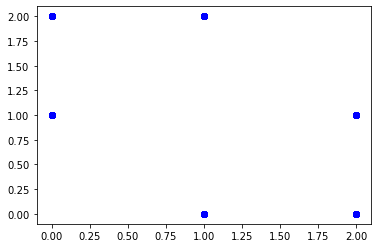

In [65]:
plt.plot(x,y, 'bo')

## Classification - Simple NN

In [308]:
ds_x = tf.data.Dataset.from_tensor_slices(x)
ds_y = tf.data.Dataset.from_tensor_slices(y)
dataset = tf.data.Dataset.zip((ds_x,ds_y)).batch(100)

In [309]:
model = keras.models.Sequential(name = 'Simple_NN_Classification')

encoding = keras.layers.experimental.preprocessing.CategoryEncoding(max_tokens=3, input_shape=[1], name='Encoding')
dense = keras.layers.Dense(units = 3, activation = 'softmax', name="Dense")

model.add(encoding)
model.add(dense)

model.compile(optimizer = keras.optimizers.Adam(.01), loss = 'sparse_categorical_crossentropy', metrics=['accuracy', 'categorical_accuracy', 'sparse_categorical_accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='loss',patience=10, min_delta=.0001, verbose=True, restore_best_weights=True)

model.summary()

Model: "Simple_NN_Classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoding (CategoryEncoding)  (None, 3)                 0         
_________________________________________________________________
Dense (Dense)                (None, 3)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


Restoring model weights from the end of the best epoch.
Epoch 00077: early stopping
100/100 [==============================] - 0s 1ms/step - loss: 0.5656 - accuracy: 0.7472 - categorical_accuracy: 0.3324 - sparse_categorical_accuracy: 0.7472


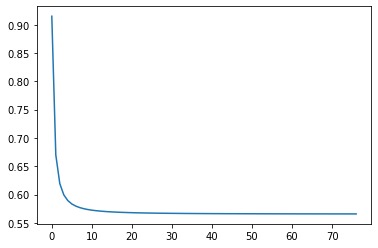

In [310]:
history = model.fit(dataset, epochs=1000, verbose=0, callbacks=[early_stopping])
model.evaluate(dataset)
plt.plot(history.history['loss'])

## Classification - Recurrent Unit + Encoding

In [311]:
input_dim = 1
sequence_length = 10
batch_size = 20

ds_x = tf.data.Dataset.from_tensor_slices(x)
ds_y = tf.data.Dataset.from_tensor_slices(y)
dataset = tf.data.Dataset.zip((ds_x, ds_y)).batch(input_dim).batch(sequence_length).batch(batch_size)

In [312]:
model = keras.models.Sequential(name = 'Simple_RNN_with_encoding')

encoding = keras.layers.experimental.preprocessing.CategoryEncoding(max_tokens=3, name='Encoding') # input_shape=[1]
td_encoding = keras.layers.TimeDistributed(encoding, input_shape=[None, 1], name="TD_encoding")
recurrent = keras.layers.SimpleRNN(units = 3, return_sequences=True, name='Recurrent', activation='softmax')

model.add(td_encoding)
model.add(recurrent)

model.compile(optimizer = keras.optimizers.Adam(.01), loss = 'sparse_categorical_crossentropy', metrics=['accuracy', 'categorical_accuracy', 'sparse_categorical_accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='loss',patience=10, min_delta=.0001, verbose=True, restore_best_weights=True)

model.summary()

Model: "Simple_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
TD_encoding (TimeDistributed (None, None, 3)           0         
_________________________________________________________________
Recurrent (SimpleRNN)        (None, None, 3)           21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


Restoring model weights from the end of the best epoch.
Epoch 00122: early stopping
50/50 [==============================] - 1s 2ms/step - loss: 0.5654 - accuracy: 0.3324 - categorical_accuracy: 0.3324 - sparse_categorical_accuracy: 0.7472


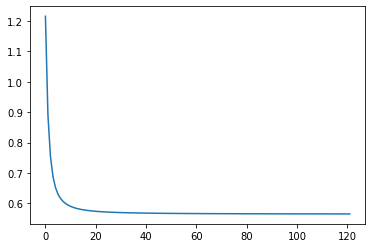

In [313]:
history = model.fit(dataset, epochs=1000, verbose=0, callbacks=[early_stopping])
model.evaluate(dataset)
plt.plot(history.history['loss'])

## Classification - Recurrent unit + Embedding

In [364]:
input_dim = 1
sequence_length = 10
batch_size = 20
embedding_dim = 2

ds_x = tf.data.Dataset.from_tensor_slices(x)
ds_y = tf.data.Dataset.from_tensor_slices(y)
dataset = tf.data.Dataset.zip((ds_x, ds_y)).batch(sequence_length, drop_remainder=True).batch(batch_size, drop_remainder=True)

In [365]:
model = keras.models.Sequential(name = 'Simple_RNN_with_Embedding')

embedding = keras.layers.Embedding(input_dim = 3, output_dim = embedding_dim, name='Embedding', input_shape=[None]) # input_shape=[1]
recurrent = keras.layers.SimpleRNN(units = 3, return_sequences=True, name='Recurrent', activation='softmax')

model.add(embedding)
model.add(recurrent)

model.compile(optimizer = keras.optimizers.Adam(.01), loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='loss',patience=10, min_delta=.0001, verbose=True, restore_best_weights=True)

model.summary()

Model: "Simple_RNN_with_Embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, None, 2)           6         
_________________________________________________________________
Recurrent (SimpleRNN)        (None, None, 3)           18        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


Restoring model weights from the end of the best epoch.
Epoch 00044: early stopping
50/50 [==============================] - 0s 2ms/step - loss: 0.5658 - sparse_categorical_accuracy: 0.7472


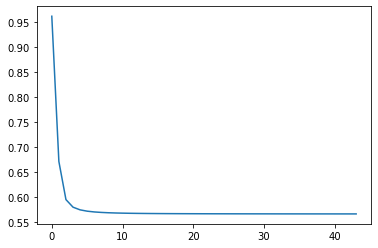

In [366]:
history = model.fit(dataset, epochs=1000, verbose=0, callbacks=[early_stopping])
model.evaluate(dataset)
plt.plot(history.history['loss'])

## Classification: Embedding -> Simple RNN + LN
* tests with saving and loading a model with a custom layer

In [134]:
input_dim = 1
sequence_length = 10
batch_size = 20
embedding_dim = 2

ds_x = tf.data.Dataset.from_tensor_slices(x)
ds_y = tf.data.Dataset.from_tensor_slices(y)
dataset = tf.data.Dataset.zip((ds_x, ds_y)).batch(sequence_length, drop_remainder=True).batch(batch_size, drop_remainder=True)

In [135]:
class LN_Simple_RNN_Cell(keras.layers.Layer):
    def __init__(self, units, activation='tanh', dropout=0, recurrent_dropout=0, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.dropout = dropout
        self.recurrent_dropout = recurrent_dropout
        self.state_size = units
        self.output_size = units
        self.GRU_cell = keras.layers.GRUCell(units, dropout=dropout, recurrent_dropout=recurrent_dropout, activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)
    def call(self, inputs, states):
        outputs, new_states = self.GRU_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [new_states]
    def get_config(self):
        base_config = super().get_config()
        custom_config = {'units':self.units,
                         'dropout':self.dropout,
                         'recurrent_dropout':self.recurrent_dropout,
                         #'state_size':self.state_size,
                         #'output_size':self.output_size,
                         #'GRU_cell':self.GRU_cell,
                         #'layer_norm':self.layer_norm,
                         'activation':self.activation}
        return {**base_config, **custom_config}

embedding = keras.layers.Embedding(input_dim = 3, output_dim = embedding_dim, name='Embedding', input_shape=[None]) # input_shape=[1]
ln_recurrent_cell = LN_Simple_RNN_Cell(units = 3, name='Recurrent', activation='softmax')
ln_recurrent_layer = keras.layers.RNN(ln_recurrent_cell, name="LN_Recurrent", return_sequences=True, input_shape=[None,None])

model = keras.models.Sequential([embedding, ln_recurrent_layer], name = 'Simple_RNN_LN_with_Embedding')

model.compile(optimizer = keras.optimizers.Adam(.01), loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=10, min_delta=.0001, verbose=True, restore_best_weights=True)

model.summary()

Model: "Simple_RNN_LN_with_Embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, None, 2)           6         
_________________________________________________________________
LN_Recurrent (RNN)           (None, None, 3)           69        
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


50/50 [==============================] - 2s 5ms/step - loss: 0.5941 - sparse_categorical_accuracy: 0.7407


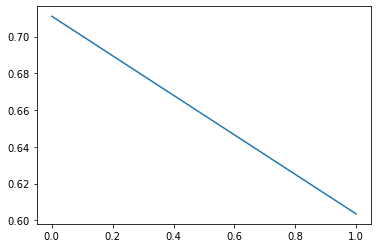

In [136]:
history = model.fit(dataset, epochs=2, verbose=0, callbacks=[early_stopping])
model.evaluate(dataset)
plt.plot(history.history['loss'])

In [137]:
# save model
filepath = join('toy_models', 'LN_RNN_custom_layer.h5')
model.save(filepath)
del model

# save custom objects
custom_objects_dictionary = {'LN_Simple_RNN_Cell':LN_Simple_RNN_Cell}
custom_objects_filepath = join('toy_models', 'custom_objects_dictionary')
with open(custom_objects_filepath, 'wb') as file:
    pickle.dump(custom_objects_dictionary, file)
#del LN_Simple_RNN_Cell
del custom_objects_dictionary

In [138]:
# load custom objects
with open(custom_objects_filepath, 'rb') as file:
    custom_objects_dictionary = pickle.load(file)
LN_Simple_RNN_Cell = custom_objects_dictionary['LN_Simple_RNN_Cell']
    
# load model
#model = tf.keras.models.load_model(filepath, custom_objects = {'LN_Simple_RNN_Cell':LN_Simple_RNN_Cell})
model = tf.keras.models.load_model(filepath, custom_objects = custom_objects_dictionary)

In [139]:
# evaluate model performance
model.evaluate(dataset)

50/50 [==============================] - 2s 5ms/step - loss: 0.5941 - sparse_categorical_accuracy: 0.7407


[0.594142735004425, 0.7407000064849854]

In [140]:
custom_objects_dictionary

{'LN_Simple_RNN_Cell': __main__.LN_Simple_RNN_Cell}

In [118]:
restored_layer = custom_objects_dictionary['LN_Simple_RNN_Cell']

In [120]:
dir(restored_layer)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_autographed_call',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_cast_single_input',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compute_dtype',
 '_dedup_weights',
 '_deferred_dependencies',
 '_dtype',
 '_eager_losses',
 '_flatten',
 '_flatten_layers',
 '_functional_construction_call',
 '_gather_children_attribute',
 '_gather_saveables_for_checkpoint',
 '_get_call_arg_value',
 '_g

In [122]:
dir(LN_Simple_RNN_Cell)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_autographed_call',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_cast_single_input',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compute_dtype',
 '_dedup_weights',
 '_deferred_dependencies',
 '_dtype',
 '_eager_losses',
 '_flatten',
 '_flatten_layers',
 '_functional_construction_call',
 '_gather_children_attribute',
 '_gather_saveables_for_checkpoint',
 '_get_call_arg_value',
 '_g

In [123]:
restored_layer == LN_Simple_RNN_Cell

True

In [56]:
model.get_config()

{'name': 'Simple_RNN_LN_with_Embedding',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, None),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'Embedding_input'}},
  {'class_name': 'Embedding',
   'config': {'name': 'Embedding',
    'trainable': True,
    'batch_input_shape': (None, None),
    'dtype': 'float32',
    'input_dim': 3,
    'output_dim': 2,
    'embeddings_initializer': {'class_name': 'RandomUniform',
     'config': {'minval': -0.05, 'maxval': 0.05, 'seed': None}},
    'embeddings_regularizer': None,
    'activity_regularizer': None,
    'embeddings_constraint': None,
    'mask_zero': False,
    'input_length': None}},
  {'class_name': 'RNN',
   'config': {'name': 'LN_Recurrent',
    'trainable': True,
    'batch_input_shape': (None, None, None),
    'dtype': 'float32',
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_ma

In [58]:
dir(model)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_los

In [76]:
model.name_scope()

'Simple_RNN_LN_with_Embedding spaces in name/'

In [64]:
model.trainable_weights

[<tf.Variable 'Embedding/embeddings:0' shape=(3, 2) dtype=float32, numpy=
 array([[-0.33701208,  0.3024122 ],
        [-0.08669169, -0.5576095 ],
        [ 0.3202624 ,  0.19675423]], dtype=float32)>,
 <tf.Variable 'LN_Recurrent/Recurrent/gru_cell_12/kernel:0' shape=(2, 9) dtype=float32, numpy=
 array([[ 0.7314297 ,  0.37623698,  0.17346717,  0.42275572,  0.09480136,
          0.7017414 ,  0.4713819 , -0.27533016, -0.9473149 ],
        [-0.42028707, -0.01337598,  0.07061809, -0.3238802 ,  0.88916963,
         -0.12292994, -0.48514086,  0.5598812 , -0.59118164]],
       dtype=float32)>,
 <tf.Variable 'LN_Recurrent/Recurrent/gru_cell_12/recurrent_kernel:0' shape=(3, 9) dtype=float32, numpy=
 array([[-0.3468004 ,  0.11315345,  0.26823792, -0.3529264 , -0.24984124,
          0.25637892, -0.59431726,  0.3976714 ,  0.62225634],
        [-0.2393412 , -0.84818274, -0.04569811,  0.65460485, -0.6474709 ,
         -1.0709172 ,  0.43998218, -0.5940854 ,  0.45714116],
        [ 0.03568586,  0.385907

In [72]:
model.name_scope()

'test test test/'

In [240]:
for item in dataset.unbatch().take(1):
    input = item[0].numpy()
    output = item[1].numpy()
    print(str(input) + ' ' + str(output))
    print(str(input.shape) + ' ' + str(output.shape))

[[1]
 [1]
 [0]
 [1]
 [2]
 [2]
 [0]
 [2]
 [0]
 [0]] [[2]
 [2]
 [1]
 [2]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]]
(10, 1) (10, 1)


array([1, 1, 0, ..., 0, 2, 2])

In [269]:
#x_test = np.array([0,1,2,0,1,2]).reshape((1,-1,1))


y_hat = model.predict_classes(x.reshape((1,-1,1))).flatten()
(y_hat == y).mean()

0.7472

In [276]:
y_hat = model.predict(x.reshape((1,-1,1))).argmax(axis=2).flatten()
(y_hat == y).mean()

0.7472

In [277]:
model.evaluate(dataset)

50/50 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.3324


[0.5654296875, 0.33239999413490295]

## Classification - Recurrent Unit + Dense Unit

In [166]:
input_dim = 1
sequence_length = 10
batch_size = 20

ds_x = tf.data.Dataset.from_tensor_slices(x)
ds_y = tf.data.Dataset.from_tensor_slices(y)
dataset = tf.data.Dataset.zip((ds_x, ds_y)).batch(input_dim).batch(sequence_length).batch(batch_size)

In [167]:
for item in dataset.take(1):
    print(item)

(<tf.Tensor: shape=(20, 10, 1), dtype=int32, numpy=
array([[[1],
        [1],
        [0],
        [1],
        [2],
        [2],
        [0],
        [2],
        [0],
        [0]],

       [[2],
        [1],
        [1],
        [1],
        [1],
        [2],
        [1],
        [0],
        [2],
        [2]],

       [[1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [2],
        [1],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        [1],
        [1],
        [2],
        [1],
        [0],
        [2],
        [2]],

       [[0],
        [2],
        [1],
        [1],
        [1],
        [2],
        [2],
        [1],
        [0],
        [2]],

       [[1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [2],
        [2],
        [2],
        [2]],

       [[2],
        [1],
        [1],
        [2],
        [0],
        [1],
        [2],
        [1],
        [2],
        [0]],

       [[2],
        [2]

In [180]:
model = keras.models.Sequential(name = 'Simple_RNN')

encoding = keras.layers.experimental.preprocessing.CategoryEncoding(max_tokens=3, name='Encoding') # input_shape=[1]
recurrent = keras.layers.SimpleRNN(units = 5, return_sequences=True, name='Recurrent')
dense = keras.layers.Dense(units = 3, activation = 'softmax', name="Dense")

#model.add(encoding)

model.add(keras.layers.TimeDistributed(encoding, input_shape=[None, 1], name="TD_encoding"))

model.add(recurrent)
model.add(dense)

model.compile(optimizer = keras.optimizers.Adam(.01), loss = 'sparse_categorical_crossentropy', metrics='accuracy')
early_stopping = keras.callbacks.EarlyStopping(monitor='loss',patience=10, min_delta=.0001, verbose=True, restore_best_weights=True)

model.summary()

Model: "Simple_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
TD_encoding (TimeDistributed (None, None, 3)           0         
_________________________________________________________________
Recurrent (SimpleRNN)        (None, None, 5)           45        
_________________________________________________________________
Dense (Dense)                (None, None, 3)           18        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [177]:
history = model.fit(dataset, epochs=1000, verbose=1, callbacks=[early_stopping])

Epoch 1/1000
50/50 [==============================] - 2s 3ms/step - loss: 1.1721 - accuracy: 0.3761
Epoch 2/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.7424 - accuracy: 0.3128
Epoch 3/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.3339
Epoch 4/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.3339
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.3339
Epoch 6/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5734 - accuracy: 0.3339
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.3339
Epoch 8/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5709 - accuracy: 0.3339
Epoch 9/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5703 - accuracy: 0.3339
Epoch 10/1000
50/50 [==============================] - 0s 3ms/step - loss: 0.5698 - accuracy: 0.3339

In [187]:
encoding([2,1,0])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)>

## Trash

In [215]:
x.shape, y.shape

((10000,), (10000,))

In [221]:
ds_x = tf.data.Dataset.from_tensors(x).batch(10).batch(100)
ds_x

<BatchDataset shapes: (None, None, 10000), types: tf.int32>

In [223]:
ds_x = tf.data.Dataset.from_tensor_slices(x).batch(10).batch(100)
ds_x

<BatchDataset shapes: (None, None), types: tf.int32>

In [236]:
dataset = tf.data.Dataset.zip((tf.data.Dataset.from_tensors(x), tf.data.Dataset.from_tensors(y)))
for item in dataset.unbatch().batch(1).batch(10).batch(100).take(1):
    print(item)

(<tf.Tensor: shape=(100, 10, 1), dtype=int32, numpy=
array([[[1],
        [1],
        [0],
        [1],
        [2],
        [2],
        [0],
        [2],
        [0],
        [0]],

       [[2],
        [1],
        [1],
        [1],
        [1],
        [2],
        [1],
        [0],
        [2],
        [2]],

       [[1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [2],
        [1],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        [1],
        [1],
        [2],
        [1],
        [0],
        [2],
        [2]],

       [[0],
        [2],
        [1],
        [1],
        [1],
        [2],
        [2],
        [1],
        [0],
        [2]],

       [[1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [2],
        [2],
        [2],
        [2]],

       [[2],
        [1],
        [1],
        [2],
        [0],
        [1],
        [2],
        [1],
        [2],
        [0]],

       [[2],
        [2

In [234]:
dataset = tf.data.Dataset.zip((tf.data.Dataset.from_tensor_slices(x), tf.data.Dataset.from_tensor_slices(y)))
for item in dataset.batch(1).batch(10).batch(100).take(1):
    print(item)

(<tf.Tensor: shape=(100, 10, 1), dtype=int32, numpy=
array([[[1],
        [1],
        [0],
        [1],
        [2],
        [2],
        [0],
        [2],
        [0],
        [0]],

       [[2],
        [1],
        [1],
        [1],
        [1],
        [2],
        [1],
        [0],
        [2],
        [2]],

       [[1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [2],
        [1],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        [1],
        [1],
        [2],
        [1],
        [0],
        [2],
        [2]],

       [[0],
        [2],
        [1],
        [1],
        [1],
        [2],
        [2],
        [1],
        [0],
        [2]],

       [[1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [2],
        [2],
        [2],
        [2]],

       [[2],
        [1],
        [1],
        [2],
        [0],
        [1],
        [2],
        [1],
        [2],
        [0]],

       [[2],
        [2